# Resume Classification

    Business objective- 
     The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention


In [1]:
pip install pywin32

In [2]:
pip install antiword

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install python-docx

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
##For Data Extraction
import textract
import docx
import glob
from docx import Document
import docx2txt
import comtypes.client 
from pdfminer.high_level import extract_text
import os,re
import docx2txt
import textract
import nltk

# data transformation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB as mb
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import loadtxt 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import pickle

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import  DecisionTreeClassifier  
from sklearn import tree #plot tree
from sklearn.metrics import classification_report#,accuracy_score,r2_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir('E:\Data Science\Datascience Intership Project\Project DS3\Resumes')

['Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'Peoplesoft resumes',
 'React Developer_Deepakreddy.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_PavasGoswami.doc',
 'React Developer_PavasGoswami.docx',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Vinay Reddy.doc',
 'React Developer_Vinay Reddy.docx',
 'React Dev_Krishna Kanth.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_AnjaniPriyadarshini.docx',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs D

# Data Extraction

### Resumes

In [3]:
input_folder = "E:\Data Science\Datascience Intership Project\Project DS3\Resumes"   
output_folder= "E:\Data Science\Datascience Intership Project\Project DS3\Resumes" 

In [4]:
#code to extract text from .doc files
word = comtypes.client.CreateObject('Word.Application')

for file_name in os.listdir(input_folder):
    if file_name.endswith('.doc'):
        input_file = os.path.join(input_folder, file_name)
        output_file = os.path.join(output_folder, os.path.splitext(file_name)[0] + '.docx')

        doc = word.Documents.Open(input_file)
        doc.SaveAs(output_file, FileFormat=16)
        doc.Close()

word.Quit()

0

In [5]:
dir_Path = "E:\Data Science\Datascience Intership Project\Project DS3\Resumes" 
os.chdir(dir_Path)

In [6]:
file_List = os.listdir()

In [7]:

resumeTxt = []
for filename in file_List:
    if filename.endswith(".pdf"):
        try:
            text = extract_text(os.path.join(dir_Path, filename))
            resumeTxt.append(text)
        except Exception as e:
            print(f"Error reading PDF file '{filename}': {str(e)}")
   
    elif filename.endswith(".docx"):
        try:
            doc = docx.Document(os.path.join(dir_Path, filename))
            text = "\n".join([para.text for para in doc.paragraphs])
            resumeTxt.append(text)
        except Exception as e:
            print(f"Error reading DOCX file '{filename}': {str(e)}")
   

In [8]:
data= pd.DataFrame(resumeTxt, columns=['Resumes'])
data['Category']= 'React JS'
data

,Resumes,Category
0,Name: Ravali P \n\n ...,React JS
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS
2,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React JS
3,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS
4,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS
5,\nNaveen Sadhu\n\n\nTitle: software developer\...,React JS
6,\n\n\nPROFILE\nSearching for the opportunity t...,React JS
7,\nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...,React JS
8,"\n\n 204,Sri geethika prestige,road number 10...",React JS
9,\n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...,React JS


### Peoplesoft resumes

In [9]:
input_folder_1 = "E:\Data Science\Datascience Intership Project\Project DS3\Resumes\Peoplesoft resumes"   
output_folder_1= "E:\Data Science\Datascience Intership Project\Project DS3\Resumes\Peoplesoft resumes" 

In [10]:
#code to extract text from .doc files
word = comtypes.client.CreateObject('Word.Application')

for file_name in os.listdir(input_folder_1):
    if file_name.endswith('.doc'):
        input_file = os.path.join(input_folder_1, file_name)
        output_file = os.path.join(output_folder_1, os.path.splitext(file_name)[0] + '.docx')

        doc = word.Documents.Open(input_file)
        doc.SaveAs(output_file, FileFormat=16)
        doc.Close()

word.Quit()

0

In [11]:
dir_Path = "E:\Data Science\Datascience Intership Project\Project DS3\Resumes\Peoplesoft resumes" 
os.chdir(dir_Path)

In [12]:
 file_List = os.listdir()

In [13]:
resumeTxt = []
for filename in file_List:
    if filename.endswith(".pdf"):
        try:
            text = extract_text(os.path.join(dir_Path, filename))
            resumeTxt.append(text)
        except Exception as e:
            print(f"Error reading PDF file '{filename}': {str(e)}")
   
    elif filename.endswith(".docx"):
        try:
            doc = docx.Document(os.path.join(dir_Path, filename))
            text = "\n".join([para.text for para in doc.paragraphs])
            resumeTxt.append(text)
        except Exception as e:
            print(f"Error reading DOCX file '{filename}': {str(e)}")
   

In [14]:
data1 = pd.DataFrame(resumeTxt, columns=['Resumes'])
data1['Category']='Peoplesoft '
data1

,Resumes,Category
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft
1,\n\n\n\n\n\n\t\n\nProfile Summary:\t\t\t\t\t\t...,Peoplesoft
2,PeopleSoft Database Administrator\n ...,Peoplesoft
3,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft
4,"Priyanka Ramadoss\n61/46, MountPleasant, \nCoo...",Peoplesoft
5,\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\...,Peoplesoft
6,PEOPLESOFT Administrator\n\n\nSRINIVAS.K \t\t\...,Peoplesoft
7,PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...,Peoplesoft
8,Vinod Akkala ...,Peoplesoft
9,PeopleSoft Admin/PeopleSoft DBA\n\nGanesh All...,Peoplesoft


### SQL Developer Lightning insight

In [15]:
input_folder_2 = "E:\Data Science\Datascience Intership Project\Project DS3\Resumes\SQL Developer Lightning insight"   
output_folder_2= "E:\Data Science\Datascience Intership Project\Project DS3\Resumes\SQL Developer Lightning insight"

In [16]:
#code to extract text from .doc files
word = comtypes.client.CreateObject('Word.Application')

for file_name in os.listdir(input_folder_2):
    if file_name.endswith('.doc'):
        input_file = os.path.join(input_folder_2, file_name)
        output_file = os.path.join(output_folder_2, os.path.splitext(file_name)[0] + '.docx')

        doc = word.Documents.Open(input_file)
        doc.SaveAs(output_file, FileFormat=16)
        doc.Close()

word.Quit()

0

In [17]:
dir_Path = "E:\Data Science\Datascience Intership Project\Project DS3\Resumes\SQL Developer Lightning insight" 
os.chdir(dir_Path)

In [18]:
 file_List = os.listdir()

In [19]:
resumeTxt = []
for filename in file_List:
    if filename.endswith(".pdf"):
        try:
            text = extract_text(os.path.join(dir_Path, filename))
            resumeTxt.append(text)
        except Exception as e:
            print(f"Error reading PDF file '{filename}': {str(e)}")
   
    elif filename.endswith(".docx"):
        try:
            doc = docx.Document(os.path.join(dir_Path, filename))
            text = "\n".join([para.text for para in doc.paragraphs])
            resumeTxt.append(text)
        except Exception as e:
            print(f"Error reading DOCX file '{filename}': {str(e)}")

In [20]:
data2 = pd.DataFrame(resumeTxt, columns=['Resumes'])
data2['Category']='SQL Developer'
data2

,Resumes,Category
0,ANIL KUMAR MADDUKURI \t\t\nSQL & MSBI Develop...,SQL Developer
1,\nAradhana Tripathi\n\nCurrent Location: Gachi...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,\n\n\n Hyderabad\n\nNazeer Basha\nSQL and Pow...,SQL Developer
5,\n Res...,SQL Developer
6,SQL DEVELOPER\nName: - Bandi prem sai\n\n\nW...,SQL Developer
7,SQL SER...,SQL Developer
8,SQL SER...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\nProfessional Summary:...,SQL Developer


### workday resumes

In [21]:
input_folder_3 = "E:\Data Science\Datascience Intership Project\Project DS3\Resumes\workday resumes"   
output_folder_3= "E:\Data Science\Datascience Intership Project\Project DS3\Resumes\workday resumes"

In [22]:
#code to extract text from .doc files
word = comtypes.client.CreateObject('Word.Application')

for file_name in os.listdir(input_folder_3):
    if file_name.endswith('.doc'):
        input_file = os.path.join(input_folder_3, file_name)
        output_file = os.path.join(output_folder_3, os.path.splitext(file_name)[0] + '.docx')

        doc = word.Documents.Open(input_file)
        doc.SaveAs(output_file, FileFormat=16)
        doc.Close()

word.Quit()

0

In [23]:
dir_Path = "E:\Data Science\Datascience Intership Project\Project DS3\Resumes\workday resumes" 
os.chdir(dir_Path)

In [24]:
 file_List = os.listdir()

In [25]:
resumeTxt = []
for filename in file_List:
    if filename.endswith(".pdf"):
        try:
            text = extract_text(os.path.join(dir_Path, filename))
            resumeTxt.append(text)
        except Exception as e:
            print(f"Error reading PDF file '{filename}': {str(e)}")
   
    elif filename.endswith(".docx"):
        try:
            doc = docx.Document(os.path.join(dir_Path, filename))
            text = "\n".join([para.text for para in doc.paragraphs])
            resumeTxt.append(text)
        except Exception as e:
            print(f"Error reading DOCX file '{filename}': {str(e)}")

In [26]:
data3 = pd.DataFrame(resumeTxt, columns=['Resumes'])
data3['Category']='workday resumes'
data3

,Resumes,Category
0,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,workday resumes
1,\t\n\n\nName : Gopi Krishna Reddy\n\t\...,workday resumes
2,Hari Krishna M\n\n\nSummary:\nA result oriente...,workday resumes
3,Harikrishna Akula ...,workday resumes
4,HIMA.MENDU\n \n\nCareer Objective\nTo continu...,workday resumes
5,\n ...,workday resumes
6,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\n\t\nPR...,workday resumes
7,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,workday resumes
8,\t\t\t\t\tMadeeswar A\n\t\n\t\nPROFILE SUMMARY...,workday resumes
9,\n\nMooraboyina Guravaiah\nWorkday Integration...,workday resumes


In [27]:
df = data.append([data1, data2, data3], ignore_index = True)
df

,Resumes,Category
0,Name: Ravali P \n\n ...,React JS
1,\nSUSOVAN BAG \nSeeking a challenging ...,React JS
2,Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...,React JS
3,HARIPRIYA BATTINA \nExperience as UI Developer...,React JS
4,KAMALAKAR REDDY. A \nLinked In: https://www.li...,React JS
...,...,...
74,\tWorkday Integration Consultant\n\nName ...,workday resumes
75,Seeking suitable positions in Workday HCM as ...,workday resumes
76,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday resumes
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday resumes


In [29]:
# Replace 'data.xlsx' with the desired file name and path where you want to save the Excel file
output_path = 'E:/Data Science/Datascience Intership Project/Project DS3/data.xlsx'

# Save the DataFrame to an Excel file
df.to_excel(output_path, index=False)

# EDA

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [32]:
df.duplicated().sum()

0

In [33]:
# Converting into Lower case
df['Resumes']=df['Resumes'].str.lower()
df.head()

,Resumes,Category
0,name: ravali p \n\n ...,React JS
1,\nsusovan bag \nseeking a challenging ...,React JS
2,kanumuru deepak reddy\n\n\n\ncareer objective:...,React JS
3,haripriya battina \nexperience as ui developer...,React JS
4,kamalakar reddy. a \nlinked in: https://www.li...,React JS


In [34]:
# Removing other unwanted text
import string

def clean_text(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+", '',text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('http[^\s]+', '',text)
    text = re.sub(':', '',text)
    text = re.sub('\n', '',text)
    text = re.sub("●", " ",text)
    text = re.sub("◉", " ",text)
    text = re.sub("", " ",text) 
    text = re.sub("!", " ",text) 
    return text

clean = lambda x: clean_text(x)
df["clean_text"] = df["Resumes"].apply(clean_text) # Clean The Text
df.head()

,Resumes,Category,clean_text
0,name: ravali p \n\n ...,React JS,name ravali p ...
1,\nsusovan bag \nseeking a challenging ...,React JS,susovan bag seeking a challenging posi...
2,kanumuru deepak reddy\n\n\n\ncareer objective:...,React JS,kanumuru deepak reddycareer objectiveto secure...
3,haripriya battina \nexperience as ui developer...,React JS,haripriya battina experience as ui developer i...
4,kamalakar reddy. a \nlinked in: https://www.li...,React JS,kamalakar reddy. a linked in professional sum...


In [35]:
import string

def remove_punctuation(text):
    # Get the translation table for removing punctuation
    translator = str.maketrans('', '', string.punctuation)
    # Remove punctuation using the translation table
    cl_text = text.translate(translator)
    return cl_text

clean = lambda x: clean_text(x)
df["clean_text"] = df["Resumes"].apply(clean_text) # Clean The Text
df.head()

,Resumes,Category,clean_text
0,name: ravali p \n\n ...,React JS,name ravali p ...
1,\nsusovan bag \nseeking a challenging ...,React JS,susovan bag seeking a challenging posi...
2,kanumuru deepak reddy\n\n\n\ncareer objective:...,React JS,kanumuru deepak reddycareer objectiveto secure...
3,haripriya battina \nexperience as ui developer...,React JS,haripriya battina experience as ui developer i...
4,kamalakar reddy. a \nlinked in: https://www.li...,React JS,kamalakar reddy. a linked in professional sum...


### Tokenization

In [36]:
# Tokenization,Stammimg and Removing stopwords,punctuations
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+ ['haha','Yes','I','and','the','in','to','of','for','with','as']

# tokenize
df['NC_text'] = [nltk.word_tokenize(x) for x in df['clean_text']]

# stopword removal
df['NC_text'] = df['NC_text'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
stemmer = PorterStemmer()
df['NC_text'] = df['NC_text'].apply(lambda x: [stemmer.stem(i) for i in x])
df['NC_text'] = df['NC_text'].apply(lambda x: ' '.join(x))
df.head()

,Resumes,Category,clean_text,NC_text
0,name: ravali p \n\n ...,React JS,name ravali p ...,name ravali p curriculum vita special comput s...
1,\nsusovan bag \nseeking a challenging ...,React JS,susovan bag seeking a challenging posi...,susovan bag seek challeng posit field scienc t...
2,kanumuru deepak reddy\n\n\n\ncareer objective:...,React JS,kanumuru deepak reddycareer objectiveto secure...,kanumuru deepak reddycar objectiveto secur pos...
3,haripriya battina \nexperience as ui developer...,React JS,haripriya battina experience as ui developer i...,haripriya battina experi ui develop reactj jav...
4,kamalakar reddy. a \nlinked in: https://www.li...,React JS,kamalakar reddy. a linked in professional sum...,kamalakar reddi link profession summari year e...


##  CountVectorizer
      CountVectorizer is a feature extraction technique used in natural language processing (NLP) to convert a collection of text documents into numerical feature vectors.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9, stop_words='english')
X = vectorizer.fit_transform(df["NC_text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head()

,term,occurrences,frequency
0,ab,1,0.000031
1,abdul,2,0.000061
2,abil,35,0.001068
3,abilities,1,0.000031
4,abl,3,0.000092


## TFIDF - Term frequency inverse Document Frequency
         The TF-IDF score helps to identify important and distinguishing terms within a document relative to a corpus of documents. It is often used for tasks such as information retrieval, document classification, and text summarization.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df["NC_text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df1 = pd.DataFrame(denselist, columns = names_features)
df1.head()

,abil,absenc,academ,accept,access,accord,account,achiev,action,activ,...,workshop,workstat,world,writ,write,writer,written,xml,xslt,xtt
0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.085529,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.115020,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.054479,0.0,0.0,0.054479,0.0,0.000000,0.058778,0.034464,...,0.0,0.0,0.061415,0.054479,0.0,0.0,0.108958,0.0,0.0,0.0
3,0.000000,0.0,0.078791,0.0,0.0,0.000000,0.0,0.066153,0.000000,0.099687,...,0.0,0.0,0.177643,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.049115,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.094866,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


## N-gram
     N-grams are contiguous sequences of n items (characters, words, or tokens) extracted from a longer text. N-grams are commonly used in natural language processing and computational linguistics to capture the local patterns or relationships between words in a given piece of text. The value of "n" determines the number of items in each sequence

### Unigram

In [39]:
def get_top_n1_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(1,1), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [40]:
top1_words = get_top_n1_words(df["NC_text"], n=200) #top 200
top1_df = pd.DataFrame(top1_words)
top1_df.columns = ["uni-gram", "Freq"]
top1_df.head(11)

,uni-gram,Freq
0,report,488
1,experi,486
2,use,445
3,server,437
4,applic,422
5,develop,409
6,work,401
7,peoplesoft,384
8,workday,353
9,integr,343


### Bi-gram

In [41]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [42]:
top2_words = get_top_n2_words(df["NC_text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,applic server,120
1,process schedul,107
2,sql server,101
3,web server,83
4,custom report,76
5,busi process,75
6,react js,70
7,workday studio,61
8,peopl tool,60
9,year experi,58


### Tri-gram

In [43]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [44]:
top3_words = get_top_n3_words(df["NC_text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,process schedul server,48
1,server web server,42
2,server process schedul,40
3,applic server web,37
4,applic server domain,36
5,server domain process,35
6,domain process schedul,35
7,peoplesoft internet architectur,26
8,domain web server,24
9,applic server process,23


### TextBlob
    Use TextBlob to predict polarity of sentiments (although they are known).




In [45]:
#Using textblob
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["NC_text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df.head(11)

,Resumes,Category,clean_text,NC_text,subjectivity,polarity
0,name: ravali p \n\n ...,React JS,name ravali p ...,name ravali p curriculum vita special comput s...,0.513957,0.565189
1,\nsusovan bag \nseeking a challenging ...,React JS,susovan bag seeking a challenging posi...,susovan bag seek challeng posit field scienc t...,0.415476,0.419048
2,kanumuru deepak reddy\n\n\n\ncareer objective:...,React JS,kanumuru deepak reddycareer objectiveto secure...,kanumuru deepak reddycar objectiveto secur pos...,0.535119,0.090604
3,haripriya battina \nexperience as ui developer...,React JS,haripriya battina experience as ui developer i...,haripriya battina experi ui develop reactj jav...,0.428307,0.274868
4,kamalakar reddy. a \nlinked in: https://www.li...,React JS,kamalakar reddy. a linked in professional sum...,kamalakar reddi link profession summari year e...,0.278788,0.245076
5,\nnaveen sadhu\n\n\ntitle: software developer\...,React JS,naveen sadhutitle software developer\t\t\t\t ...,naveen sadhutitl softwar develop locat hyderab...,0.593939,0.284848
6,\n\n\nprofile\nsearching for the opportunity t...,React JS,profilesearching for the opportunity to bring ...,profilesearch opportun bring year experi softw...,0.784091,-0.191856
7,\npragnya pattnaik\n \n \n \n expertise: \n \...,React JS,pragnya pattnaik expertise having around ...,pragnya pattnaik expertis around year experi u...,0.586324,0.180789
8,"\n\n 204,sri geethika prestige,road number 10...",React JS,",sri geethika prestige,road number ,bandari ...",sri geethika prestig road number bandari layou...,0.611742,0.244773
9,\n\nthirupathamma balla\n\nsummary:\n\n2.8 yea...,React JS,thirupathamma ballasummary. year of it experie...,thirupathamma ballasummari year experi react d...,0.562626,0.301010


# Data Visual

# WordCloud

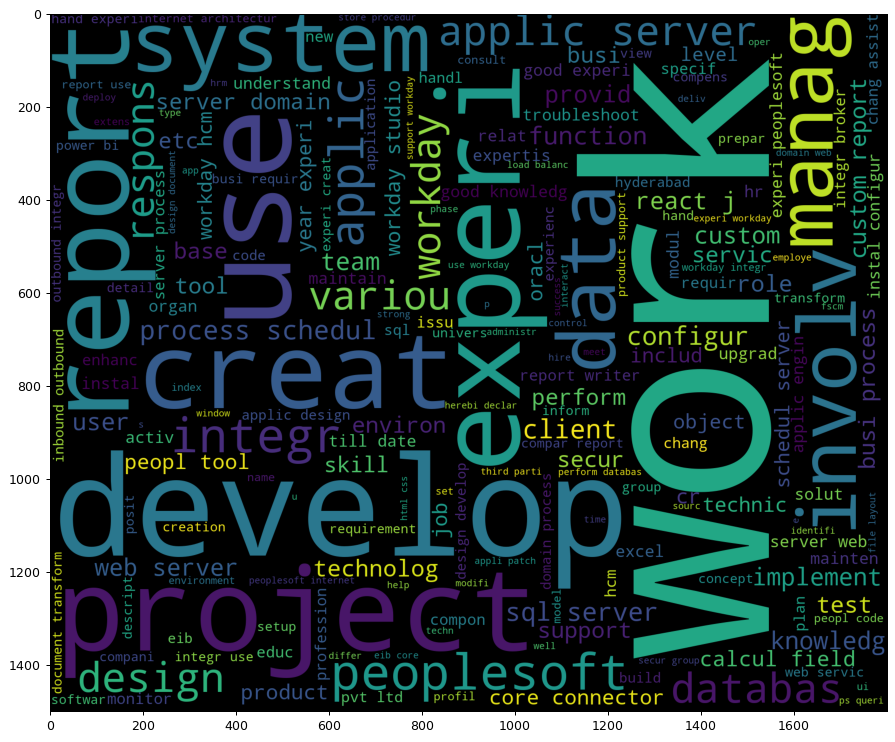

In [46]:
#Generate Word Cloud
#wordcloud for entire corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
string_Total = " ".join(df["NC_text"])
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);


    The WordCloud Highlight the words like peoplesoft,report,data,sql,etc.. which is important form resumes

In [47]:
categories = np.sort(df['Category'].unique())
data_categories = [df[df['Category'] == category].loc[:, ['NC_text', 'Category']] for category in categories]
data_categories

[                                              NC_text     Category
 24  anubhav kumar singh work global competit envir...  Peoplesoft 
 25  profil summari year experi implement upgrad su...  Peoplesoft 
 26  peoplesoft databas administr gangareddi profes...  Peoplesoft 
 27  muraliexperi summari year experi work peopleso...  Peoplesoft 
 28  priyanka ramadoss/ mountpleas coonoorth nilgir...  Peoplesoft 
 29  profil summaryi overal year experi peoplesoft ...  Peoplesoft 
 30  peoplesoft administratorsrinivas.k experi summ...  Peoplesoft 
 31  peoplesoft adminvarkala vikascar objectivei to...  Peoplesoft 
 32  vinod akkala peoplesoft dba admin profession s...  Peoplesoft 
 33  peoplesoft admin/peoplesoft dbaganesh alladi c...  Peoplesoft 
 34  peoplesoft administr vivekanand sayana career ...  Peoplesoft 
 35  arun venu experi summari experi year month mul...  Peoplesoft 
 36  experi summari years- experi develop support m...  Peoplesoft 
 37  rahul ahuja -- -- -- -- -- -- -- -- -- -- -

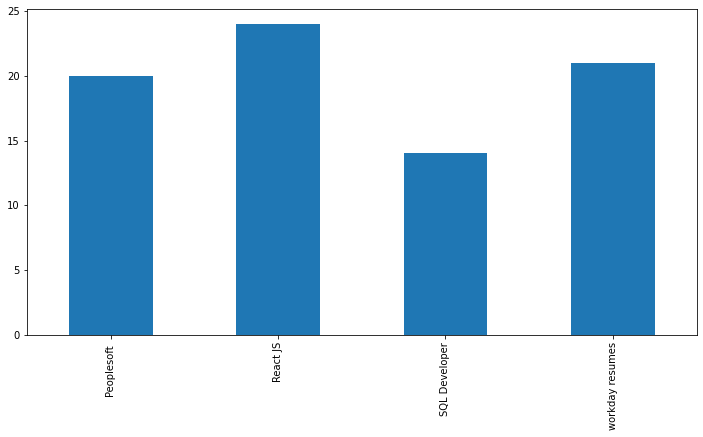

In [48]:

df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

React Js has more REsumes compare ro other

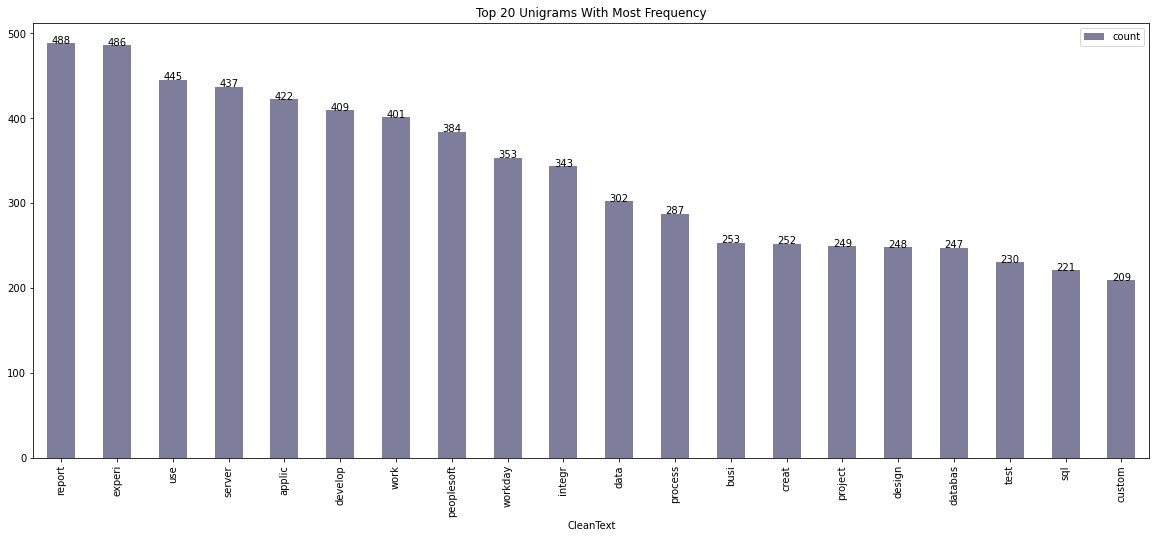

In [49]:
#get_top_n_words() returns the n-grams. n can be specified by user
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['NC_text'], 20)  #Will Take  n = 20
#for word, freq in common_words:
    #print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
##Visualizing results
#Barchart for top 10 nouns + verbs
df1[0:20].plot.bar(x='CleanText', figsize=(20,8), title='Top 20 Unigrams With Most Frequency',color ='#7f7D9C')
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i],ha = 'center')
addlabels(df1['CleanText'],df1['count'])
plt.show()

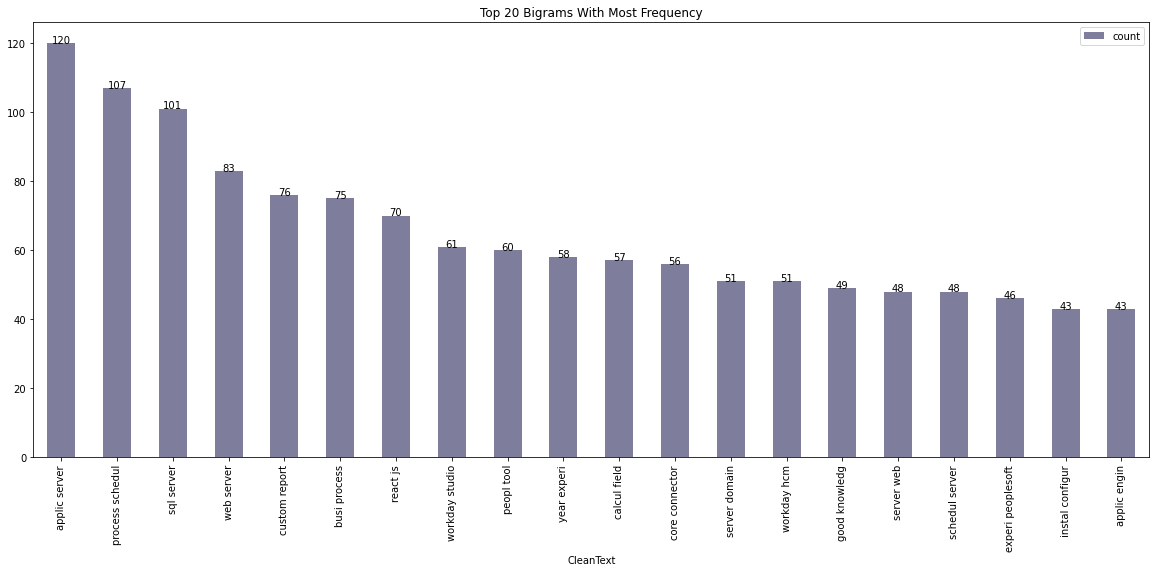

In [50]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['NC_text'], 20)
#for word, freq in common_words:
    #print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
##Visualizing results
#Barchart for top 10 nouns + verbs
df2[0:20].plot.bar(x='CleanText', figsize=(20,8), title='Top 20 Bigrams With Most Frequency',color ='#7f7D9C')
#Adding Labels
addlabels(df2['CleanText'],df2['count'])
plt.show()

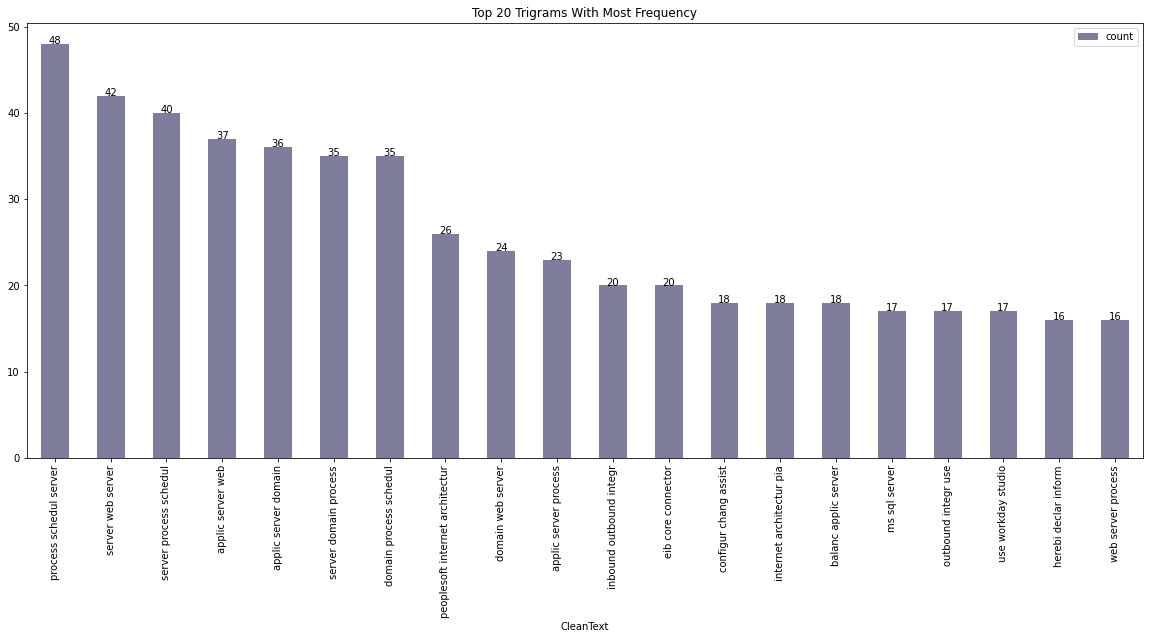

In [51]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['NC_text'], 20)
#for word, freq in common_words:
    #print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['CleanText' , 'count'])
##Visualizing results
#Barchart for top 10 nouns + verbs
df3[0:20].plot.bar(x='CleanText', figsize=(20,8), title='Top 20 Trigrams With Most Frequency',color ='#7f7D9C')
#Adding Labels
addlabels(df3['CleanText'],df3['count'])
plt.show()

In [52]:
#encode data
label_encoder = preprocessing.LabelEncoder()
df['Category']= label_encoder.fit_transform(df['Category']) 
df

,Resumes,Category,clean_text,NC_text,subjectivity,polarity
0,name: ravali p \n\n ...,1,name ravali p ...,name ravali p curriculum vita special comput s...,0.513957,0.565189
1,\nsusovan bag \nseeking a challenging ...,1,susovan bag seeking a challenging posi...,susovan bag seek challeng posit field scienc t...,0.415476,0.419048
2,kanumuru deepak reddy\n\n\n\ncareer objective:...,1,kanumuru deepak reddycareer objectiveto secure...,kanumuru deepak reddycar objectiveto secur pos...,0.535119,0.090604
3,haripriya battina \nexperience as ui developer...,1,haripriya battina experience as ui developer i...,haripriya battina experi ui develop reactj jav...,0.428307,0.274868
4,kamalakar reddy. a \nlinked in: https://www.li...,1,kamalakar reddy. a linked in professional sum...,kamalakar reddi link profession summari year e...,0.278788,0.245076
...,...,...,...,...,...,...
74,\tworkday integration consultant\n\nname ...,3,\tworkday integration consultantname ...,workday integr consultantnam sri krishna profe...,0.346212,0.174459
75,seeking suitable positions in workday hcm as ...,3,seeking suitable positions in workday hcm as ...,seek suitabl posit workday hcm techno function...,0.455195,0.153166
76,\nworkday | hcm | fcm\nname \t\t: kumar s.s\nr...,3,workday | hcm | fcmname \t\t kumar s.srole \t\...,workday hcm fcmname kumar s.srole workday cons...,0.630303,-0.136742
77,venkateswarlu.b\t\t\t\t\t\t\t\tworkday consult...,3,venkateswarlu.b\t\t\t\t\t\t\t\tworkday consult...,venkateswarlu.b workday consult year experi ye...,0.542593,0.287037


In [53]:
df['Category'].value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

In [54]:
x = df['NC_text'].values
y = df['Category'].values

In [55]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(x)
WordFeatures = word_vectorizer.transform(x)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(WordFeatures,y,random_state=45, test_size=0.2)
x_train.shape, x_test.shape

((63, 3967), (16, 3967))

# Model Buliding

### Models we will use:
    Logistic Classification
    
    Random Forest Regressor

    Bagging classifier

    K-Nearest Neighbours(KNN)
    
    Support Vector Machines

    AdaBoost Classification

    Naive Bayes
    
    Xtreme Gradient Boosting Classifier(XGBoost)
    
    Gradient Boosting Classifier	
    
    Light Gradient Boosting Classifier(LGBoost)

## 1) Logistic Classification

In [57]:
#Logistic regression and fit the model
classifier_lr = LogisticRegression(random_state=42)
classifier_lr.fit(x_train,y_train)
#Predict for X dataset
y_pred_lr = classifier_lr.predict(x_test)

In [58]:
# Confusion Matrix for the model accuracy
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_lr

array([[4, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]], dtype=int64)

In [59]:
#Classification Report 
print (classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [60]:
accuracy_1 = (accuracy_score(y_test,y_pred_lr))
precision_1 = (precision_score(y_test,y_pred_lr,average = 'weighted'))
recall_1 = (recall_score(y_test,y_pred_lr, average = 'weighted'))
f1_1 = (f1_score(y_test,y_pred_lr, average = 'weighted'))
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


## 2) Random Forest Regressor

In [61]:
kfold=KFold(n_splits=5,random_state=72,shuffle=True)

In [62]:
#Logistic regression and fit the model
classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(x_train,y_train)
#Predict for X dataset
y_pred_rf = classifier_rf.predict(x_test)

In [63]:
# Confusion Matrix for the model accuracy
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_rf

array([[4, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]], dtype=int64)

In [64]:
#Classification Report 
print (classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [65]:
accuracy_2 = (accuracy_score(y_test,y_pred_rf))
precision_2 = (precision_score(y_test,y_pred_rf,average = 'weighted'))
recall_2 = (recall_score(y_test,y_pred_rf, average = 'weighted'))
f1_2 = (f1_score(y_test,y_pred_rf, average = 'weighted'))
print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


## 3) Bagging classifier

In [66]:
bag_c=BaggingClassifier()
bag_c.fit(x_train,y_train)
y_pred_bag = bag_c.predict(x_test)

In [67]:
# Confusion Matrix for the model accuracy
confusion_matrix_bag = confusion_matrix(y_test, y_pred_bag)
confusion_matrix_bag

array([[4, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]], dtype=int64)

In [68]:
#Classification Report 
print (classification_report(y_test,y_pred_bag))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [69]:
accuracy_3 = (accuracy_score(y_test,y_pred_bag))
precision_3 = (precision_score(y_test,y_pred_bag,average = 'weighted'))
recall_3 = (recall_score(y_test,y_pred_bag,average = 'weighted'))
f1_3 = (f1_score(y_test,y_pred_bag,average = 'weighted'))
print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


## 4) K-Nearest Neighbours(KNN)



In [70]:
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)

In [71]:
# Confusion Matrix for the model accuracy
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
confusion_matrix_knn

array([[4, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]], dtype=int64)

In [72]:
#Classification Report 
print (classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [73]:
accuracy_4 = (accuracy_score(y_test,y_pred_knn))
precision_4 = (precision_score(y_test,y_pred_knn,average = 'weighted'))
recall_4 = (recall_score(y_test,y_pred_knn,average = 'weighted'))
f1_4 = (f1_score(y_test,y_pred_knn,average = 'weighted'))
print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


## 5) Support Vector Machines

In [74]:
model_linear = SVC(kernel = "poly")
model_linear.fit(x_train,y_train)
y_pred_svm = model_linear.predict(x_test)


In [75]:
# Confusion Matrix for the model accuracy
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrix_svm

array([[4, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 3]], dtype=int64)

In [76]:
#Classification Report 
print (classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.88      1.00      0.93         7
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.97      0.88      0.90        16
weighted avg       0.95      0.94      0.93        16



In [77]:
accuracy_5 = (accuracy_score(y_test,y_pred_svm))
precision_5 = round(precision_score(y_test,y_pred_svm,average = 'weighted'),4)
recall_5 = (recall_score(y_test,y_pred_svm,average = 'weighted'))
f1_5 = round(f1_score(y_test,y_pred_svm,average = 'weighted'),4)
print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  0.9375
Precision Score :  0.9453
Recall Score    :  0.9375
f1-Score        :  0.9292



## 6) AdaBoost Classification



In [78]:
model_ab= AdaBoostClassifier(n_estimators=60, random_state=8)    
model_ab.fit(x_train,y_train,sample_weight=60)
y_pred_ab = model_ab.predict(x_test)


In [79]:
# Confusion Matrix for the model accuracy
confusion_matrix_ab = confusion_matrix(y_test, y_pred_ab)
confusion_matrix_ab

array([[0, 4, 0, 0],
       [0, 7, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]], dtype=int64)

In [80]:
#Classification Report 
print (classification_report(y_test,y_pred_ab))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      1.00      0.78         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           0.75        16
   macro avg       0.66      0.75      0.69        16
weighted avg       0.59      0.75      0.65        16



In [81]:
accuracy_6 = (accuracy_score(y_test,y_pred_ab))
precision_6 = round(precision_score(y_test,y_pred_ab,average = 'weighted'),4)
recall_6 = (recall_score(y_test,y_pred_ab,average = 'weighted'))
f1_6 = round(f1_score(y_test,y_pred_ab,average = 'weighted'),4)
print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.75
Precision Score :  0.5909
Recall Score    :  0.75
f1-Score        :  0.6528


## 7) Naive Bayes

In [82]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred_naive = nb.predict(x_test)


In [83]:
# Confusion Matrix for the model accuracy
confusion_matrix_naive = confusion_matrix(y_test, y_pred_naive)
confusion_matrix_naive

array([[4, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]], dtype=int64)

In [84]:
#Classification Report 
print (classification_report(y_test,y_pred_naive))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [85]:
accuracy_7 = (accuracy_score(y_test,y_pred_naive))
precision_7 = round (precision_score(y_test,y_pred_naive,average = 'weighted'),4)
recall_7 = (recall_score(y_test,y_pred_naive,average = 'weighted'))
f1_7 = round(f1_score(y_test,y_pred_naive,average = 'weighted'),4)
print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


## 8) Xtreme Gradient Boosting Classifier(XGBoost)

In [86]:
# fit model no training data
model_xg = XGBClassifier(n_estimators=10,gamma = 0.6)
model_xg.fit(x_train, y_train)
y_pred_XGB = model_xg.predict(x_test)

In [87]:
# Confusion Matrix for the model accuracy
confusion_matrix_XGB = confusion_matrix(y_test, y_pred_naive)
confusion_matrix_XGB

array([[4, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]], dtype=int64)

In [88]:
#Classification Report 
print (classification_report(y_test,y_pred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [89]:
accuracy_8 = (accuracy_score(y_test,y_pred_XGB))
precision_8 = round(precision_score(y_test,y_pred_XGB,average = 'weighted'),4)
recall_8 = (recall_score(y_test,y_pred_XGB,average = 'weighted'))
f1_8 = round(f1_score(y_test,y_pred_XGB,average = 'weighted'),4)
print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


## 9) Gradient Boosting Classifier    


In [90]:
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train,y_train)
y_pred_gb = model_gb.predict(x_test)

In [91]:
# Confusion Matrix for the model accuracy
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
confusion_matrix_gb

array([[4, 0, 0, 0],
       [0, 6, 1, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]], dtype=int64)

In [92]:
#Classification Report 
print (classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.86      0.92         7
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.92      0.96      0.93        16
weighted avg       0.96      0.94      0.94        16



In [93]:
accuracy_9 = (accuracy_score(y_test,y_pred_gb))
precision_9 = round(precision_score(y_test,y_pred_gb,average = 'weighted'),4)
recall_9 = (recall_score(y_test,y_pred_gb,average = 'weighted'))
f1_9 = round(f1_score(y_test,y_pred_gb,average = 'weighted'),4)
print('Accuracy Score  : ', accuracy_9)
print('Precision Score : ', precision_9)
print('Recall Score    : ', recall_9)
print('f1-Score        : ', f1_9)

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9413


 ## 10) Light Gradient Boosting Classifier(LGBoost)

In [94]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train,y_train)
y_pred_lgbm = model_lgbm.predict(x_test)

In [95]:
# Confusion Matrix for the model accuracy
confusion_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
confusion_matrix_lgbm

array([[4, 0, 0, 0],
       [0, 7, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]], dtype=int64)

In [96]:
#Classification Report 
print (classification_report(y_test,y_pred_lgbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [97]:
accuracy_10 = (accuracy_score(y_test,y_pred_lgbm))
precision_10 = round(precision_score(y_test,y_pred_lgbm,average = 'weighted'),4)
recall_10 = (recall_score(y_test,y_pred_lgbm,average = 'weighted'))
f1_10 = round(f1_score(y_test,y_pred_lgbm,average = 'weighted'),4)
print('Accuracy Score  : ', accuracy_10)
print('Precision Score : ', precision_10)
print('Recall Score    : ', recall_10)
print('f1-Score        : ', f1_10)


Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


In [98]:
df_models = {'Models' : ['Logistic Classification','Random Forest Regressor','Bagging classifier','K-Nearest Neighbours(KNN)','Support Vector Machines(SVM)',
                         'AdaBoost Classification','Naive Bayes','Xtreme Gradient Boosting Classifier(XGBoost)','Gradient Boosting Classifier',
                         'Light Gradient Boosting Classifier(LGBoost)'], 
         'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8, accuracy_9 ,accuracy_10],
         'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8, precision_9,precision_10],
         'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8, recall_9,recall_10],
         'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8, f1_9,f1_10]}
df_models = pd.DataFrame(df_models)
df_models

,Models,Accuracy,Precision Score,Recall Score,F1_Score
0,Logistic Classification,1.0000,1.0000,1.0000,1.0000
1,Random Forest Regressor,1.0000,1.0000,1.0000,1.0000
2,Bagging classifier,1.0000,1.0000,1.0000,1.0000
3,K-Nearest Neighbours(KNN),1.0000,1.0000,1.0000,1.0000
4,Support Vector Machines(SVM),0.9375,0.9453,0.9375,0.9292
5,AdaBoost Classification,0.7500,0.5909,0.7500,0.6528
6,Naive Bayes,1.0000,1.0000,1.0000,1.0000
7,Xtreme Gradient Boosting Classifier(XGBoost),1.0000,1.0000,1.0000,1.0000
8,Gradient Boosting Classifier,0.9375,0.9583,0.9375,0.9413
9,Light Gradient Boosting Classifier(LGBoost),1.0000,1.0000,1.0000,1.0000


## Saving Model

In [105]:
filename = 'final_svm_model.pkl'
pickle.dump(model_linear, open(filename,'wb'))

In [106]:
pickled_model=pickle.load(open('final_svm_model.pkl','rb'))

In [100]:
pickle.dump(doc_vec,open('tfidf.pkl','wb'))

In [103]:
tfidf=pickle.load(open('tfidf.pkl','rb'))